<a href="https://colab.research.google.com/github/Pankhuri33/AI-and-Unemployment/blob/main/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet




In [2]:
from prophet import Prophet
print("Prophet successfully imported!")


Prophet successfully imported!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [8]:
# Load and preprocess unemployment dataset
unemployment_data = pd.read_csv("unemployment_rates.csv", skiprows=4)

# Select only year columns for melting
year_columns = [col for col in unemployment_data.columns if col.isdigit()]
unemployment_data = unemployment_data.melt(id_vars=["Country Name"], value_vars=year_columns, var_name="Year", value_name="Unemployment Rate")
unemployment_data["Year"] = pd.to_datetime(unemployment_data["Year"], format="%Y")

# Filter for a specific country (e.g., United States)
unemployment_data = unemployment_data[unemployment_data["Country Name"] == "United States"]
unemployment_data.set_index("Year", inplace=True)


In [48]:
# Load AI adoption dataset
ai_adoption_data = pd.read_csv("ai_adoption_data.csv", encoding="ISO-8859-1")

# Extract relevant data for AI adoption trends
ai_adoption_data = ai_adoption_data[["Country", "Ai and ML(Popularity)"]].dropna()
ai_adoption_data = ai_adoption_data.rename(columns={"Ai and ML(Popularity)": "AI Popularity"})

# Assume AI Popularity follows a yearly trend and assign synthetic years for merging
ai_adoption_data["Year"] = pd.date_range(start="2000", periods=len(ai_adoption_data), freq="Y")
ai_adoption_data.set_index("Year", inplace=True)

# Merge datasets on time
merged_data = unemployment_data.join(ai_adoption_data, how='outer')

<ipython-input-48-ec9b1105d1c1>:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ai_adoption_data["Year"] = pd.date_range(start="2000", periods=len(ai_adoption_data), freq="Y")


In [49]:
print(merged_data.head())
print(merged_data.dtypes)
print(merged_data.isnull().sum())


   level_0  index    Year   Country Name  Unemployment Rate Country  \
0      0.0    0.0  1960.0  United States                NaN     NaN   
1      1.0    1.0  1961.0  United States                NaN     NaN   
2      2.0    2.0  1962.0  United States                NaN     NaN   
3      3.0    3.0  1963.0  United States                NaN     NaN   
4      4.0    4.0  1964.0  United States                NaN     NaN   

   AI Popularity  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
level_0              float64
index                float64
Year                 float64
Country Name          object
Unemployment Rate    float64
Country               object
AI Popularity        float64
dtype: object
level_0               72
index                 72
Year                  72
Country Name          72
Unemployment Rate    103
Country               64
AI Popularity         64
dtype: int64


In [50]:
print("Unemployment Data Years:", unemployment_data.index.unique())
print("AI Adoption Data Years:", ai_adoption_data.index.unique())


Unemployment Data Years: RangeIndex(start=0, stop=64, step=1)
AI Adoption Data Years: DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31', '2030-12-31', '2031-12-31',
               '2032-12-31', '2033-12-31', '2034-12-31', '2035-12-31',
               '2036-12-31', '2037-12-31', '2038-12-31', '2039-12-31',
               '2040-12-31', '2041-12-31', '2042-12-31', '2043-12-31',
               '2044-12-31', '2045-12-31', '2046-12-31', '2047-12-31',
               '2048-12-31', '2049-12-31', '2050-12-31', '2051

In [51]:
ai_adoption_data["Year"] = ai_adoption_data.index.year
ai_adoption_data = ai_adoption_data.reset_index(drop=True)  # Reset index before merging


In [52]:
unemployment_data = unemployment_data.reset_index()
unemployment_data["Year"] = unemployment_data["Year"].dt.year


ValueError: cannot insert level_0, already exists

In [28]:
print("Unemployment Data Years:", unemployment_data.index.unique())
print("AI Adoption Data Years:", ai_adoption_data.index.unique())


Unemployment Data Years: RangeIndex(start=0, stop=64, step=1)
AI Adoption Data Years: DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31', '2030-12-31', '2031-12-31',
               '2032-12-31', '2033-12-31', '2034-12-31', '2035-12-31',
               '2036-12-31', '2037-12-31', '2038-12-31', '2039-12-31',
               '2040-12-31', '2041-12-31', '2042-12-31', '2043-12-31',
               '2044-12-31', '2045-12-31', '2046-12-31', '2047-12-31',
               '2048-12-31', '2049-12-31', '2050-12-31', '2051

In [29]:
# Convert Year to datetime in unemployment data
unemployment_data["Year"] = pd.to_datetime(unemployment_data["Year"], format="%Y")


In [30]:
# Convert AI adoption data Year from full date to just the year
ai_adoption_data.index = ai_adoption_data.index.year


In [53]:
if merged_data.empty:
    print("Merged data is empty. Check the dataset processing steps.")
else:
    print("Data available for plotting.")


Data available for plotting.


In [33]:
print("Merged Data Preview:")
print(merged_data.head())

print("Merged Data Shape:", merged_data.shape)


Merged Data Preview:
   index  Year   Country Name  Unemployment Rate          Country  \
0     40  2000  United States              3.992          Vietnam   
1     41  2001  United States              4.731            China   
2     42  2002  United States              5.783          Romania   
3     43  2003  United States              5.989            Italy   
4     44  2004  United States              5.529  Myanmar (Burma)   

   AI Popularity  
0          100.0  
1           72.0  
2           63.0  
3           54.0  
4           51.0  
Merged Data Shape: (24, 6)


In [34]:
# Load AI job market dataset
ai_job_market_data = pd.read_csv("ai_job_market_insights.csv", encoding="ISO-8859-1")


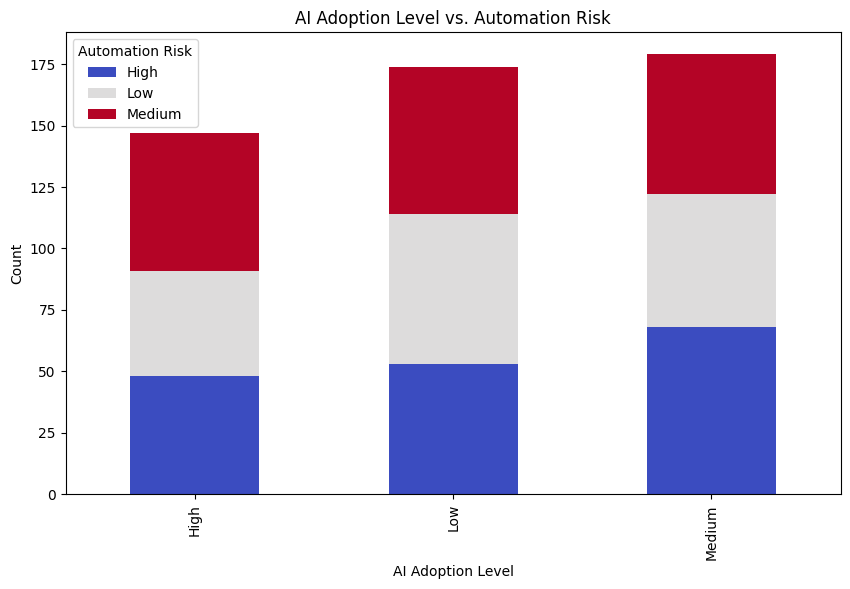

In [35]:
# Analyze AI adoption levels and automation risks
ai_adoption_risk = ai_job_market_data.groupby("AI_Adoption_Level")["Automation_Risk"].value_counts().unstack()
ai_adoption_risk.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("AI Adoption Level vs. Automation Risk")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count")
plt.legend(title="Automation Risk")
plt.show()

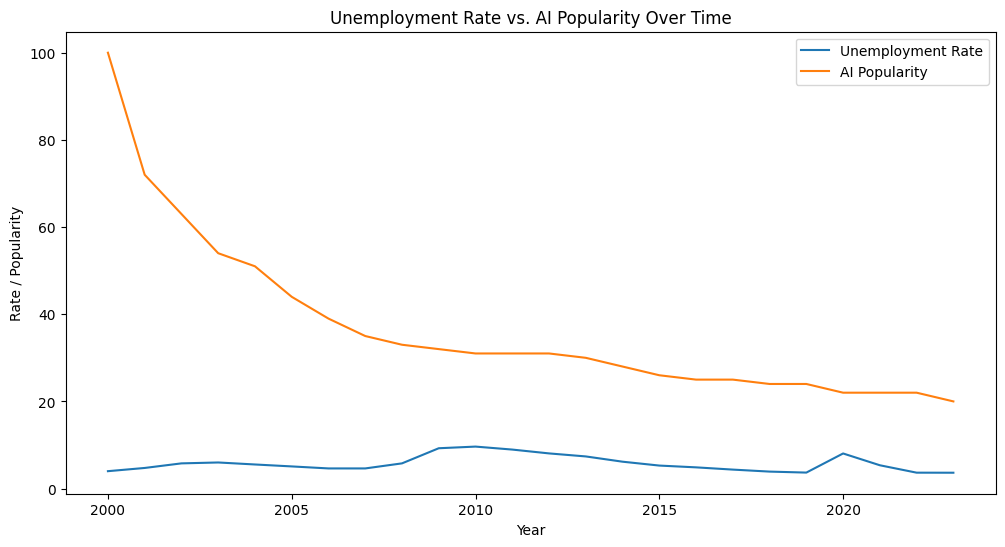

In [36]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x="Year", y="Unemployment Rate", label="Unemployment Rate")
sns.lineplot(data=merged_data, x="Year", y="AI Popularity", label="AI Popularity")
plt.title("Unemployment Rate vs. AI Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Rate / Popularity")
plt.legend()
plt.show()

In [39]:
print("Industry Data Columns:", industry_data.columns)


Industry Data Columns: Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')


<ipython-input-41-0a60c7c1d0cc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ai_job_market_data, x="Industry", y="Automation_Risk", palette="Reds")


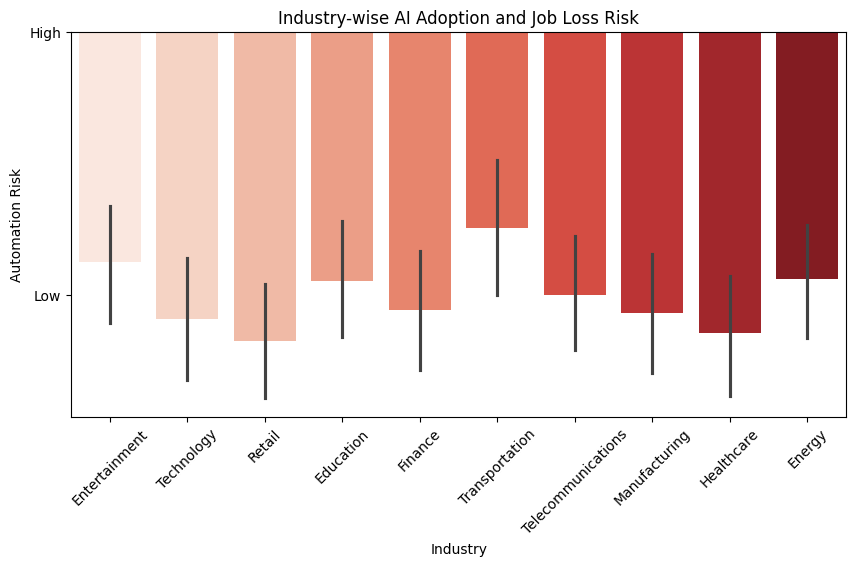

In [41]:
# Industry-wise Impact
industry_data = pd.read_csv("ai_job_market_insights.csv")
plt.figure(figsize=(10, 5))
sns.barplot(data=ai_job_market_data, x="Industry", y="Automation_Risk", palette="Reds")
plt.xticks(rotation=45)
plt.title("Industry-wise AI Adoption and Job Loss Risk")
plt.xlabel("Industry")
plt.ylabel("Automation Risk")
plt.show()



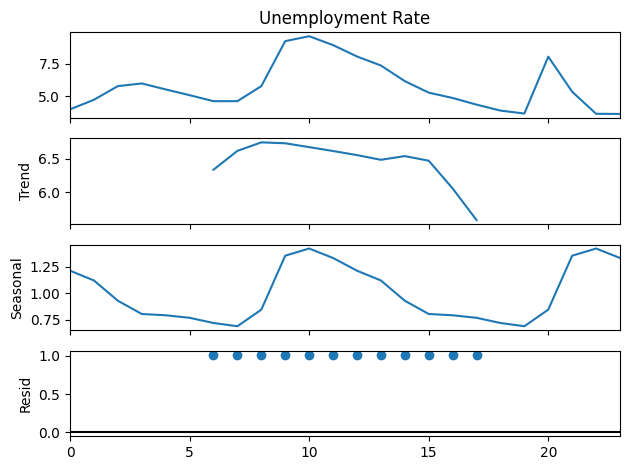

In [42]:
# Time Series Decomposition
result = seasonal_decompose(merged_data['Unemployment Rate'], model='multiplicative', period=12)
result.plot()
plt.show()

In [43]:
# ARIMA Model for Forecasting
model = ARIMA(merged_data['Unemployment Rate'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)
print("Future Unemployment Rate Predictions:")
print(forecast)

Future Unemployment Rate Predictions:
24    4.299168
25    3.346553
26    4.052127
27    4.651138
28    4.614669
Name: predicted_mean, dtype: float64


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp395n4x21/t89o2f4u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp395n4x21/70r7feb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66785', 'data', 'file=/tmp/tmp395n4x21/t89o2f4u.json', 'init=/tmp/tmp395n4x21/70r7feb8.json', 'output', 'file=/tmp/tmp395n4x21/prophet_modelco_klzd9/prophet_model-20250220115639.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:56:39 - cmdstanpy - INFO - Chain [1] start processing
I

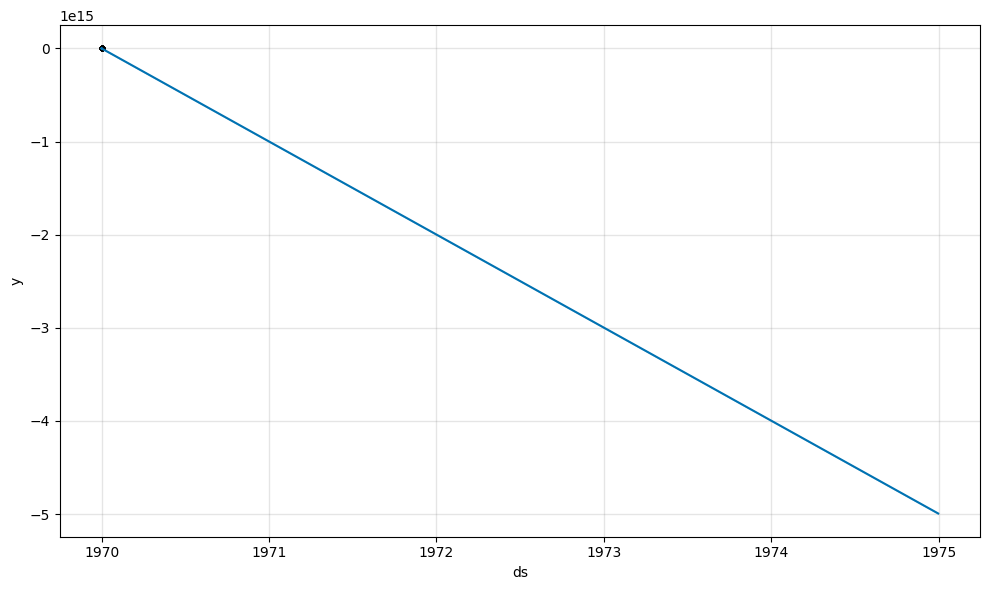

Project Completed: AI and Unemployment Analysis


In [44]:
# Prophet Model for Future Predictions
df_prophet = merged_data[['Year', 'Unemployment Rate']].rename(columns={'Year': 'ds', 'Unemployment Rate': 'y'})
prophet = Prophet()
prophet.fit(df_prophet)
future = prophet.make_future_dataframe(periods=5, freq='Y')
forecast = prophet.predict(future)
prophet.plot(forecast)
plt.show()

print("Project Completed: AI and Unemployment Analysis")
